## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
# pip install scikit-learn

In [4]:
import pandas as pd

# load dataframe from CSV file
path = "LeMonde2003_9classes.csv.gz"

# Charger le fichier CSV compressé avec pandas
df = pd.read_csv(path, compression='gzip')


<Axes: xlabel='count', ylabel='category'>

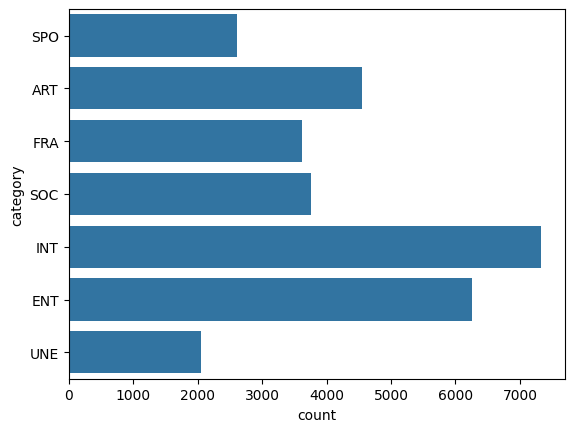

In [8]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=df, y='category')

In [9]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)

df.sample(n=3, random_state=1)


text  \
21751                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 mollah omar zindabad vive le mollah omar tracé en lettres blanches sur la montagne non loin de miranshar chef-lieu de l'agence tribale pakistanaise du waziristan-nord qui longe la frontière avec l ' afghanistan cet hommage au chef des talibans n'est qu'un signe parmi d'autres du soutien qu'ont encore dans ces zones pachtounes les étudiants en religion chassés du pouvoir à kaboul il y a près de deux ans par la coalition internationale menée par les etats-unis le mollah omar ainsi que nombre de ses ministres et responsables militaires courent toujours beaucoup d'entre eux ont récemment repris leurs activités en liaison avec les fidèles de l'ancien premier ministre pachtoune gulbuddin hekmatyar et les soldats perdus d'al-qaida qui se trouvent toujours dans le pays si les zones tribales pakistanaises constituent pour eux un refuge utile beaucoup n'ont toutefois pas de difficultés à se déplacer en afghanistan pour l'instant les primes promises par les etats-unis 25 millions de dollars pour le mollah omar et la même somme pour oussama ben laden n'ont pas délié les langues les interrogatoires des centaines de prisonniers détenus sur les bases américaines de guantanamo cuba et bagram afghanistan ne semblent pas avoir fait beaucoup avancer les choses les etats-unis dépensent pourtant 900 millions de dollars par mois pour cette chasse aux terroristes engageant 11 500 hommes et femmes dont 8 500 soldats américains basés à bagram 60 km au nord de kaboul et à kandahar l'ancien fief des talibans depuis près de deux ans ces hommes fouillent des villages arrêtent à tour de bras combattent ceux qui les attaquent sans remporter de victoire décisive malgré une énorme disproportion des moyens au contraire les talibans réorganisés mènent des attaques de plus en plus audacieuses même s'ils sont loin d'être en mesure de s'emparer du pouvoir les américains d'abord bien accueillis par une population soulagée d'être débarrassée de l'ordre taliban ont beaucoup perdu de leur aura l'incapacité de leurs soldats à comprendre ou à respecter un minimum la culture locale leur vaut beaucoup d'inimitié affirme à kandahar un professeur qui veut rester anonyme ils n'ont rien appris depuis deux ans affirme pour sa part un ancien haut responsable taliban en allusion aux arrestations indiscriminées opérées sur simple dénonciation et souvent liées à des querelles tribales dans les zones pachtounes les villageois se plaignent du comportement des soldats américains et cela n'aide pas la coalition à obtenir de bons renseignements de leur côté les libéraux reprochent aux etats-unis de s'être alliés aux seigneurs de la guerre locaux dont ils utilisent les troupes contre les terroristes au risque de leur conférer une sorte d'impunité washington n'a toujours pas résolu la contradiction consistant à vouloir un gouvernement central fort à kaboul tout en apportant un soutien aux commandants locaux leur donnant ainsi les moyens de tenir la dragée haute au gouvernement la position américaine est toujours ambiguë et n'aide pas hamid karzaï affirme à kaboul un proche du président honnis par la population certains de ces commandants entretiennent de plus des contacts à la fois avec les etats-unis et leurs adversaires l'absence du gouvernement central le manque de développement et d'assistance et celle-ci ne fait que se réduir

In [2]:
# pip install wordcloud

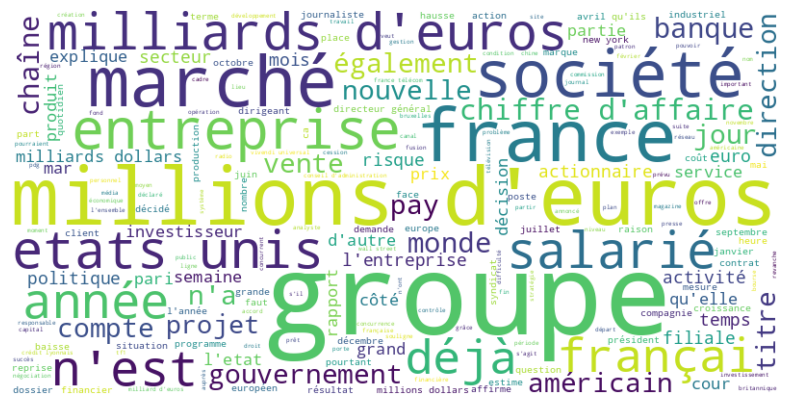

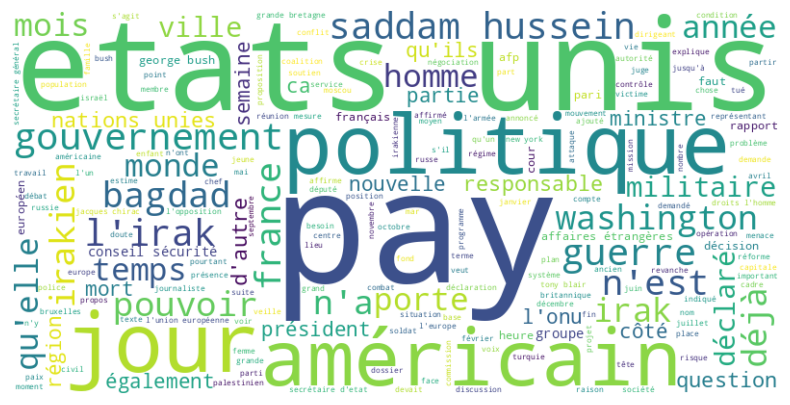

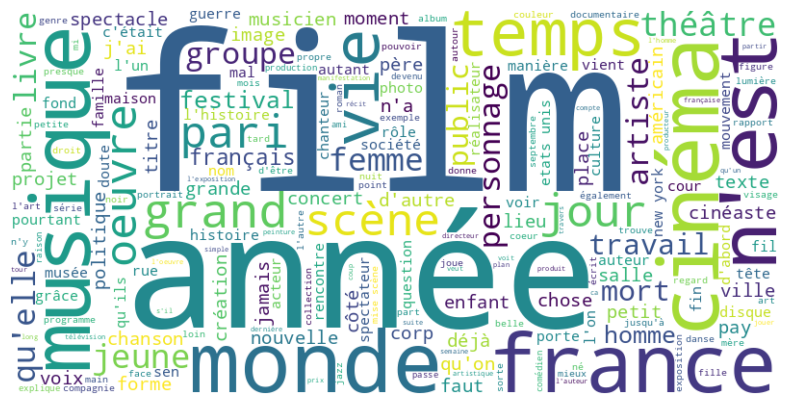

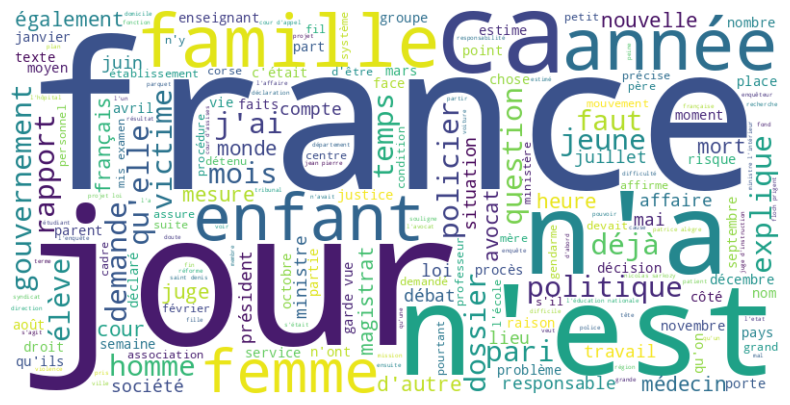

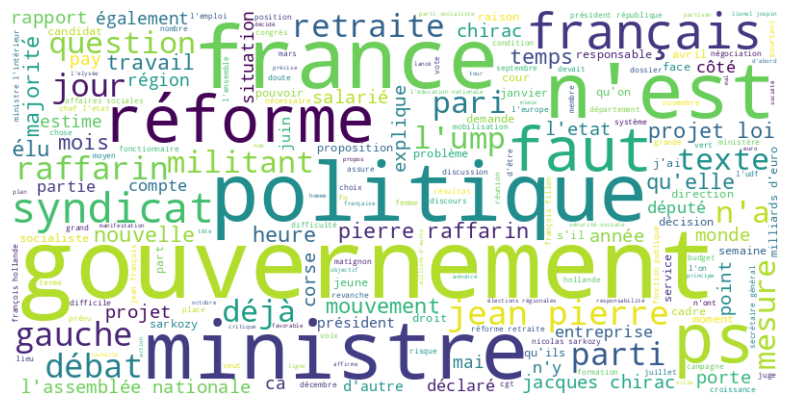

In [12]:
from wordcloud import WordCloud, STOPWORDS
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
stopwords = set(STOPWORDS)

def clean_text(text):
    if isinstance(text, str):  # Vérifier que c'est bien une string
        words = text.split()  # Tokenisation simple par espace
        words_cleaned = [word for word in words if word.lower() not in stopwords]
        return " ".join(words_cleaned)
    return text

df["text"] = df["text"].apply(clean_text)

#stopwords.update(df)

for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    df_cat = df[df['category']==cat]
    text = " ".join(df_cat["text"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

    

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [15]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
X_train, X_dev, y_train, y_dev = train_test_split(df["text"], df["category"], test_size=0.20, random_state=42)


In [16]:
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, y_dev, test_size=0.50, random_state=42)


In [17]:
import re 

def tokenize(text):
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\W+', ' ', text)  # Supprimer la ponctuation et caractères spéciaux
    words = text.split()  # Découper en mots
    return words

# Appliquer la fonction à la colonne contenant le texte
all_words = []
for doc in df["text"]:  # Remplacez "text" par le nom de la colonne contenant les documents
    all_words.extend(tokenize(str(doc)))  # Tokenisation et ajout des mots

# Créer un ensemble de mots uniques
unique_words = set(all_words)
max_features = len(unique_words)

print('max_features', max_features)

max_features 143785


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors

# create the vectorizer object
vectorizer = CountVectorizer(stop_words=STOPWORDS, max_features=max_features)  

# fit on train data
X_train_vec = vectorizer.fit_transform(X_train)
# apply it on train and dev data
X_dev_vec = vectorizer.transform(X_dev)


/opt/conda/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


In [19]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
nb_classifier = MultinomialNB()
# create the MultinomialNB
nb_classifier.fit(X_train_vec, y_train)

y_pred_dev = nb_classifier.predict(X_dev_vec)


Accuracy : 0.8166
Rapport de classification :
               precision    recall  f1-score   support

         ART       0.84      0.89      0.87       453
         ENT       0.87      0.88      0.88       603
         FRA       0.67      0.78      0.72       380
         INT       0.84      0.93      0.88       741
         SOC       0.74      0.75      0.75       377
         SPO       0.92      0.94      0.93       270
         UNE       0.67      0.02      0.04       192

    accuracy                           0.82      3016
   macro avg       0.79      0.74      0.72      3016
weighted avg       0.81      0.82      0.79      3016



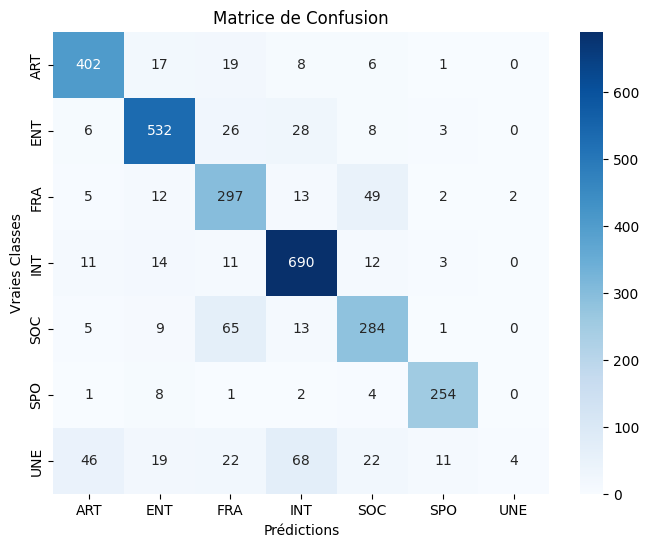

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_dev, y_pred_dev)
print(f"Accuracy : {accuracy:.4f}")

# Afficher un rapport détaillé
print("Rapport de classification :\n", classification_report(y_dev, y_pred_dev))

# Afficher la matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_dev, y_pred_dev)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.title("Matrice de Confusion")
plt.show()

In [66]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X_test_vec = vectorizer.transform(X_test)
# y_pred_test = nb_classifier.predict(X_test_vec)

# accuracy = accuracy_score(y_test, y_pred_test)
# print(f"Accuracy : {accuracy:.4f}")

# # Afficher un rapport détaillé
# print("Rapport de classification :\n", classification_report(y_test, y_pred_test))

# # Afficher la matrice de confusion
# import seaborn as sns
# import matplotlib.pyplot as plt

# conf_matrix = confusion_matrix(y_test, y_pred_test)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
# plt.xlabel("Prédictions")
# plt.ylabel("Vraies Classes")
# plt.title("Matrice de Confusion")
# plt.show()

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vectorizer = CountVectorizer(stop_words=STOPWORDS,max_features=1000)  # Limite à 5000 mots les plus fréquents
X_train_counts = count_vectorizer.fit_transform(X_train)
X_dev_counts = count_vectorizer.transform(X_dev)
X_test_counts = count_vectorizer.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_dev_tfidf = tfidf_transformer.transform(X_dev_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


/opt/conda/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


In [22]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

Accuracy : 0.7590
Rapport de classification :
               precision    recall  f1-score   support

         ART       0.81      0.88      0.84       453
         ENT       0.77      0.84      0.81       603
         FRA       0.63      0.69      0.66       380
         INT       0.78      0.88      0.83       741
         SOC       0.67      0.66      0.66       377
         SPO       0.90      0.81      0.86       270
         UNE       0.29      0.01      0.02       192

    accuracy                           0.76      3016
   macro avg       0.69      0.68      0.67      3016
weighted avg       0.73      0.76      0.74      3016



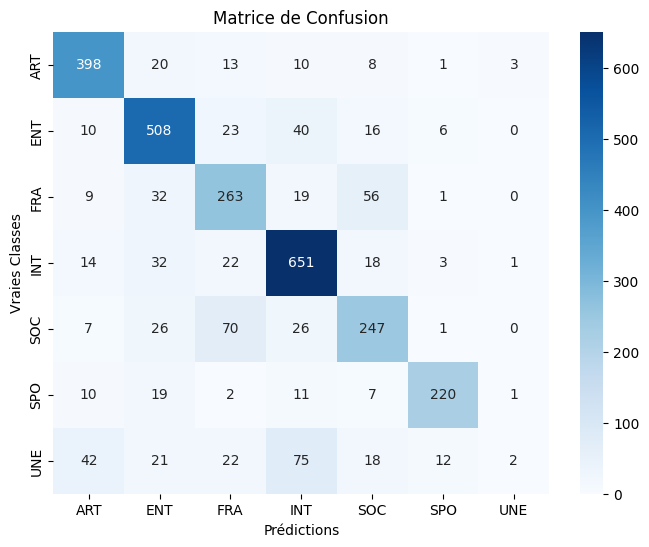

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_dev = nb_classifier.predict(X_dev_tfidf)

accuracy = accuracy_score(y_dev, y_pred_dev)
print(f"Accuracy : {accuracy:.4f}")

# Afficher un rapport détaillé
print("Rapport de classification :\n", classification_report(y_dev, y_pred_dev))

# Afficher la matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_dev, y_pred_dev)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.title("Matrice de Confusion")
plt.show()

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


Accuracy : 0.7620
Rapport de classification :
               precision    recall  f1-score   support

         ART       0.80      0.87      0.83       466
         ENT       0.78      0.88      0.83       598
         FRA       0.64      0.68      0.66       357
         INT       0.79      0.88      0.83       750
         SOC       0.66      0.66      0.66       364
         SPO       0.92      0.78      0.84       278
         UNE       0.36      0.02      0.04       204

    accuracy                           0.76      3017
   macro avg       0.71      0.68      0.67      3017
weighted avg       0.74      0.76      0.74      3017



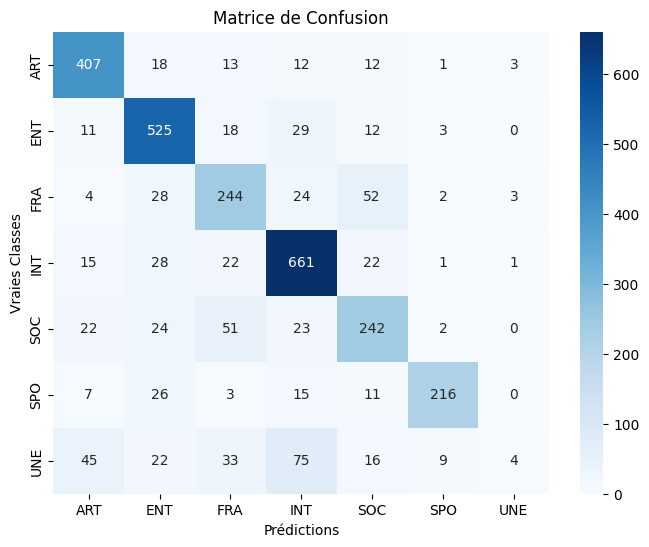

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred_test = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy : {accuracy:.4f}")


print("Rapport de classification :\n", classification_report(y_test, y_pred_test))


conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.title("Matrice de Confusion")
plt.show()



## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [25]:
df = df[df["category"] != "UNE"] 
df["category"] = df["category"].replace({"SOC": "SOC_FRA", "FRA": "SOC_FRA"})

<Axes: xlabel='count', ylabel='category'>

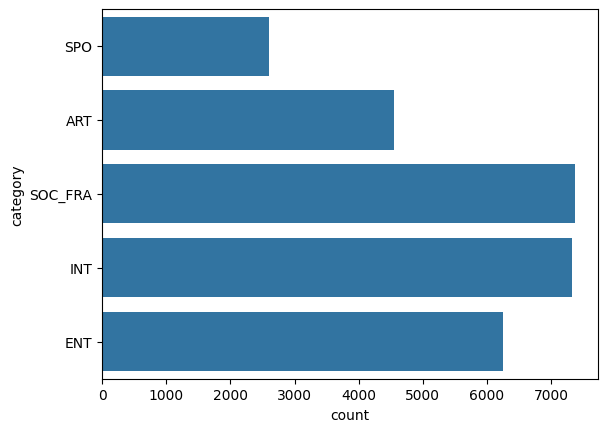

In [26]:
sns.countplot(data=df, y='category')

In [27]:
X_train, X_dev, y_train, y_dev = train_test_split(df["text"], df["category"], test_size=0.20, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, y_dev, test_size=0.50, random_state=42)

/opt/conda/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


Accuracy : 0.8776
Rapport de classification :
               precision    recall  f1-score   support

         ART       0.98      0.81      0.89       457
         ENT       0.90      0.83      0.86       630
         INT       0.87      0.95      0.91       787
     SOC_FRA       0.81      0.95      0.87       718
         SPO       1.00      0.65      0.79       219

    accuracy                           0.88      2811
   macro avg       0.91      0.84      0.86      2811
weighted avg       0.89      0.88      0.88      2811



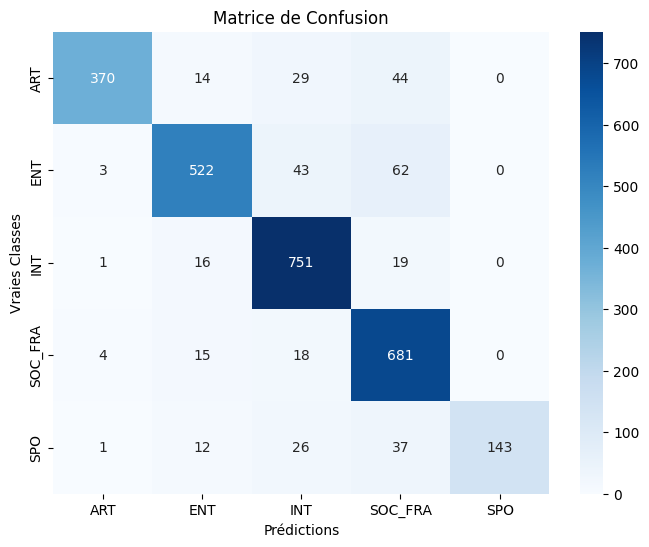

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words=STOPWORDS,max_features=max_features)  # Limite à 5000 mots les plus fréquents
X_train_counts = count_vectorizer.fit_transform(X_train)
X_dev_counts = count_vectorizer.transform(X_dev)
X_test_counts = count_vectorizer.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_dev_tfidf = tfidf_transformer.transform(X_dev_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Train MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Print accuracy
y_pred_dev = nb_classifier.predict(X_dev_tfidf)

accuracy = accuracy_score(y_dev, y_pred_dev)
print(f"Accuracy : {accuracy:.4f}")

# Afficher un rapport détaillé
print("Rapport de classification :\n", classification_report(y_dev, y_pred_dev))

# Afficher la matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_dev, y_pred_dev)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.title("Matrice de Confusion")
plt.show()

# Print confusion matric


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [41]:
#!pip install transformers 
#!pip install datasets 
#!pip install numpy

In [55]:
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    pipeline
)
import time

In [60]:
model_name = "facebook/bart-large-mnli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline("zero-shot-classification", model=model_name)


Device set to use cuda:0


In [61]:
df = pd.read_csv('LeMonde2003_9classes.csv.gz')

In [76]:
idx = 3
example_text = df.loc[idx, "text"]
print("Extrait de l'article :")
print(example_text[:500], "...")  # affichons seulement les 500 premiers caractères pour la démo

candidate_labels = df['category'].unique()

start_time = time.time()
result = classifier(
    example_text, 
    candidate_labels,
    hypothesis_template="Ce texte est à propos de {}."
)
end_time = time.time()

print("\nRésultat Zero-Shot :")
print('Labels:', result['labels'])
print('Probas:', result['scores'])
print('Predicted label:', result['labels'][np.argmax(result['scores'])])
print('True label:', df.loc[idx, "category"])
print(f"\nTemps de traitement : {end_time - start_time:.2f} secondes")


Extrait de l'article :
le tribunal administratif de limoges a annulé jeudi 27 mars un arrêté du maire de coings indre qui avait préventivement interdit en septembre 2001 la culture d'ogm en plein champ pour la limiter à des sites confinés le tribunal a considéré que cet arrêté était illégal car il n'existait pas lors de la décision du maire de cultures ou de projets de cultures d'ogm sur la commune ...

Résultat Zero-Shot :
Labels: ['INT', 'SPO', 'ENT', 'SOC', 'FRA', 'UNE', 'ART']
Probas: [0.20952607691287994, 0.15797825157642365, 0.15506820380687714, 0.14899253845214844, 0.11294414103031158, 0.10835006833076477, 0.10714071244001389]
Predicted label: INT
True label: SOC

Temps de traitement : 0.47 secondes
